## What Are Signals and Systems?

A signal is a function that conveys information. It can be continuous-time (analog) or discrete-time (digital).

A system is a process that modifies an input signal to produce an output.

## Speech Signal Processing
The sound wave from speech is a continuous-time signal.
    
A microphone samples this into a discrete-time signal for digital processing.
    
A noise filter modifies the signal, making it a system.


# Types of Signals

## Continuous-Time Signals

Defined for all time t.

Examples: Analog audio signals, ECG signals, temperature variations.

Mathematical Form:

x(t)=Asin(2πft) where A is amplitude, f is frequency.

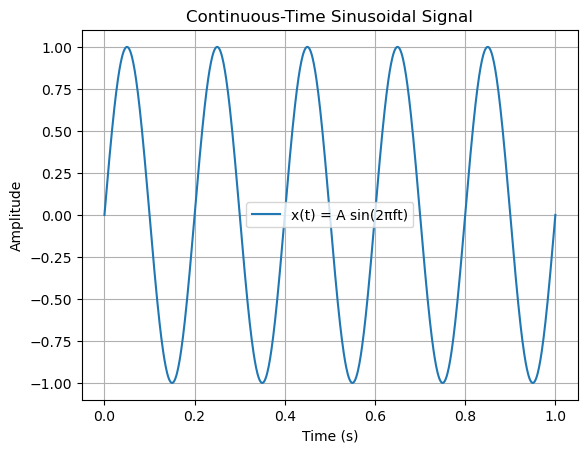

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Time vector (continuous simulation)
t = np.linspace(0, 1, 1000)  # 1 second duration
f = 5  # Frequency in Hz
A = 1  # Amplitude

# Continuous-time sinusoidal signal
x_t = A * np.sin(2 * np.pi * f * t)

# Plot
plt.plot(t, x_t, label="x(t) = A sin(2πft)")
plt.title("Continuous-Time Sinusoidal Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

This represents a 5 Hz analog sinusoidal wave (like a sound wave).

## Discrete-Time Signals

Defined only at specific time intervals.

Examples: Digital audio (MP3), pixel values in an image.

Mathematical Form:

x[n]=Asin(2πfn) where n is an integer index.

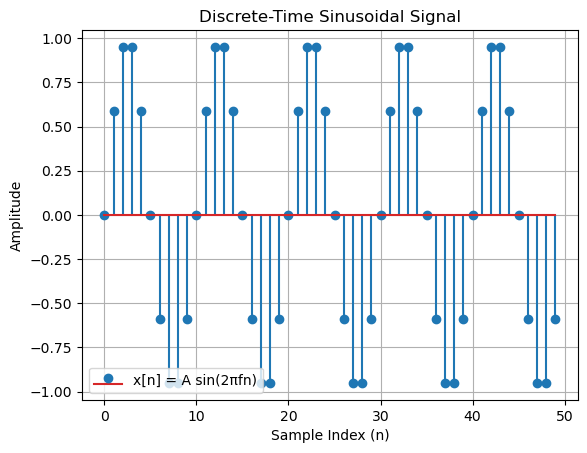

In [14]:
import numpy as np
import matplotlib.pyplot as plt

A = 1  # Amplitude
f = 1  # Frequency

n = np.arange(0, 50, 1)  # Discrete time samples
x_n = A * np.sin(2 * np.pi * f * n / 10)  # Discrete signal

plt.stem(n, x_n, label="x[n] = A sin(2πfn)")
plt.title("Discrete-Time Sinusoidal Signal")
plt.xlabel("Sample Index (n)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

## System Properties

A system modifies an input signal to produce an output. Let's explore key properties.

1. Linearity (Superposition Property)

A system is linear if the sum of inputs produces the sum of outputs.

 Mathematical Condition:


T(ax_1[n]+bx_2[n])=aT(x_1[n])+bT(x_2[n])

In [17]:
def system(x):
    return 2 * x  # Simple scaling system

x1 = np.array([1, 2, 3, 4])
x2 = np.array([2, 3, 4, 5])

# Check Superposition
a, b = 2, 3
y1 = system(a * x1 + b * x2)  # System applied to sum of inputs
y2 = a * system(x1) + b * system(x2)  # Sum of individual outputs

print("System is Linear:", np.allclose(y1, y2))

System is Linear: True


## Time-Invariance

A system is time-invariant if shifting the input shifts the output by the same amount.

Mathematical Condition:

T(x[n−k])=y[n−k]

In [20]:
def system(x):
    return np.roll(x, 2)  # Shift output by 2

x = np.array([1, 2, 3, 4])
x_shifted = np.roll(x, 1)

y1 = system(x_shifted)  # System applied after shift
y2 = np.roll(system(x), 1)  # Shift applied after system

print("System is Time-Invariant:", np.allclose(y1, y2))


System is Time-Invariant: True


## Causality

A system is causal if its output depends only on past and present inputs (not future values).

Mathematical Condition:

y[n] depends only on x[k] for k≤n

In [23]:
def causal_system(x):
    y = np.zeros_like(x)
    for i in range(len(x)):
        y[i] = np.sum(x[:i+1])  # Sum of present and past values
    return y

x = np.array([1, 2, 3, 4])
y = causal_system(x)

print("System is Causal:", y[2] == sum(x[:3]))


System is Causal: True


## Basic Transformations in Signals

1. Time Scaling
   
Compress or expand signals by changing the time axis.

Mathematical Condition:

y(t)=x(at) where a>1 (compression) and 0<a<1 (expansion).

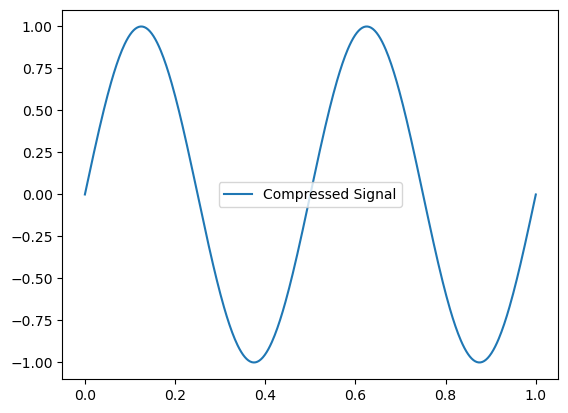

A compressed wave has a higher frequency.


In [28]:
a = 2  # Compression factor
t_scaled = np.linspace(0, 1, 500)
x_scaled = A * np.sin(2 * np.pi * f * a * t_scaled)

plt.plot(t_scaled, x_scaled, label="Compressed Signal")
plt.legend()
plt.show()
print('A compressed wave has a higher frequency.')

## Time Reversal

Flipping a signal in time.

Mathematical Condition:

y[n]=x[−n]

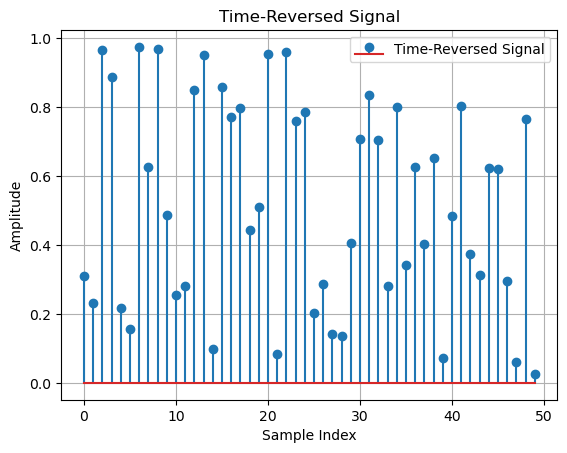

In [42]:
x = np.random.rand(50)  # Replace with your actual signal
x_reversed = x[::-1]

plt.stem(x_reversed, label="Time-Reversed Signal") 
plt.legend()
plt.title("Time-Reversed Signal")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

## Time Shifting

Moves a signal forward or backward.

Mathematical Condition:

y[n]=x[n−k]

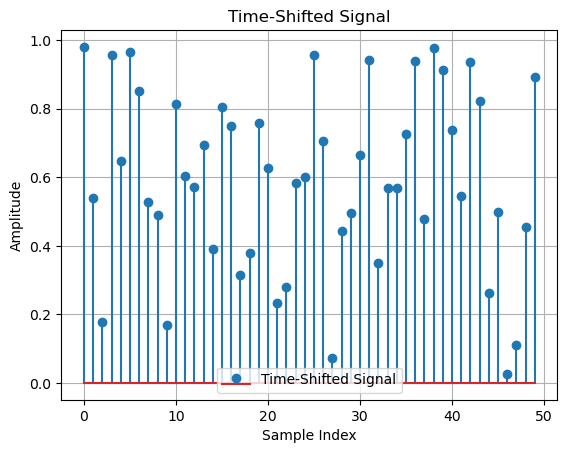

In [40]:
x = np.random.rand(50)  # Replace with your actual signal
k = 2  # Shift amount
x_shifted = np.roll(x, k)

plt.stem(x_shifted, label="Time-Shifted Signal")  
plt.legend()
plt.title("Time-Shifted Signal")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# What is the Fourier Transform?

The Fourier Transform decomposes a signal into its frequency components. Instead of analyzing how a signal changes over time, FT helps us see what frequencies are present in the signal.

For a continuous signal 

x(t), the Fourier Transform is:

X(f)=∫ x(t)exp[−j2πft]dt
For a discrete signal x[n], we use the Discrete Fourier Transform (DFT):

X[k]= ∑x[n]exp[−j2πkn/N]
 where N is the number of samples, and k is the frequency index.

## Why Use Fourier Transform?

Extract hidden frequency components from complex signals.

Detect abnormalities in signals (e.g., EEG in dementia patients).

Filter unwanted noise from signals.

Compression (e.g., MP3 reduces unnecessary frequencies).

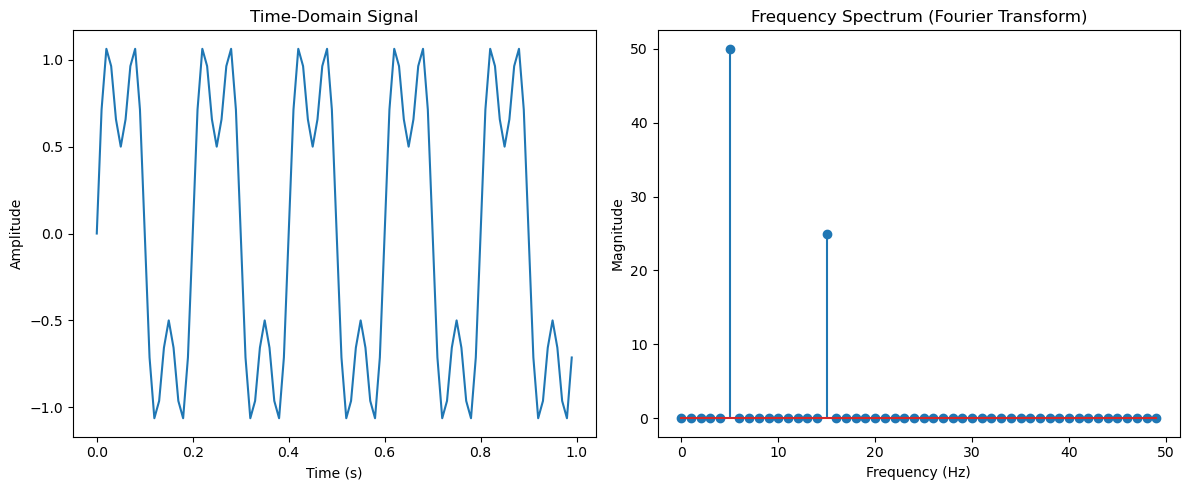

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a time-domain signal (Combination of 5Hz and 15Hz sinusoids)
fs = 100  # Sampling frequency in Hz
t = np.linspace(0, 1, fs, endpoint=False)  # 1 second duration
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 15 * t)  # Two frequencies: 5Hz & 15Hz

# Compute Fourier Transform using Fast Fourier Transform (FFT)
freqs = np.fft.fftfreq(len(signal), 1/fs)  # Frequency axis
fft_values = np.fft.fft(signal)  # Compute FFT

# Plot the original signal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, signal)
plt.title("Time-Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Plot the frequency spectrum (Magnitude of FFT)
plt.subplot(1, 2, 2)
plt.stem(freqs[:fs//2], np.abs(fft_values[:fs//2]))
plt.title("Frequency Spectrum (Fourier Transform)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

Time-domain signal: Combination of 5 Hz and 15 Hz sine waves.
Fourier Transform extracts frequency components (spikes at 5 Hz & 15 Hz).

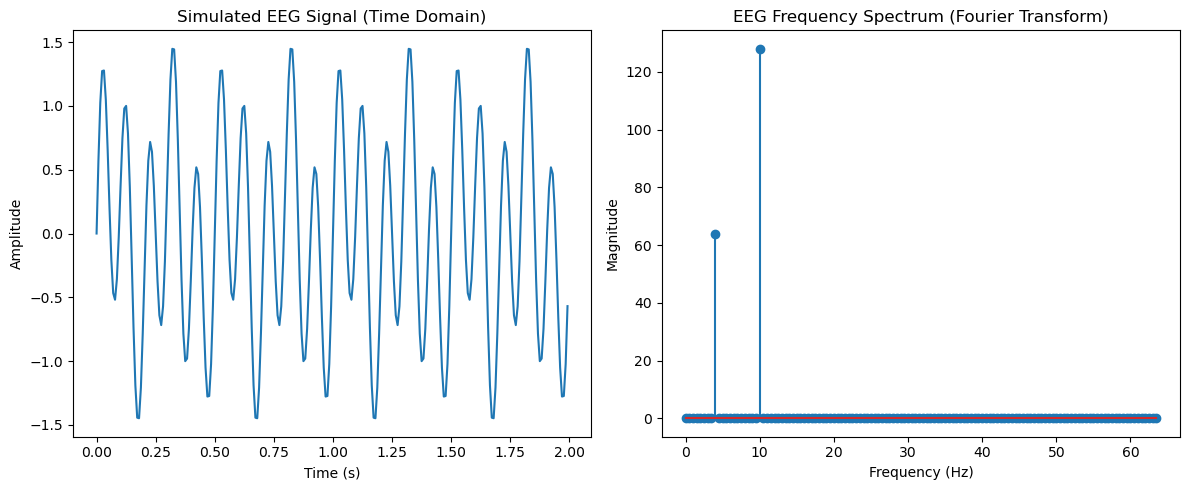

In [53]:
# Simulating an EEG-like signal with dominant Alpha (10 Hz) and Theta (4 Hz) waves
fs = 128  # EEG sampling rate (Hz)
t = np.linspace(0, 2, fs*2, endpoint=False)  # 2 seconds
eeg_signal = np.sin(2 * np.pi * 10 * t) + 0.5 * np.sin(2 * np.pi * 4 * t)  # Alpha & Theta waves

# Compute FFT
freqs = np.fft.fftfreq(len(eeg_signal), 1/fs)
fft_values = np.fft.fft(eeg_signal)

# Plot EEG signal and its frequency spectrum
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t, eeg_signal)
plt.title("Simulated EEG Signal (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(1, 2, 2)
plt.stem(freqs[:fs], np.abs(fft_values[:fs]))
plt.title("EEG Frequency Spectrum (Fourier Transform)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

10 Hz (Alpha wave) is dominant, as in normal brain activity.
4 Hz (Theta wave) is also present, which is more prominent in dementia patients.
Shifts in frequency components can indicate cognitive impairment.

## Applying Fourier Transform for Noise Filtering

Low-Pass Filter Using FFT

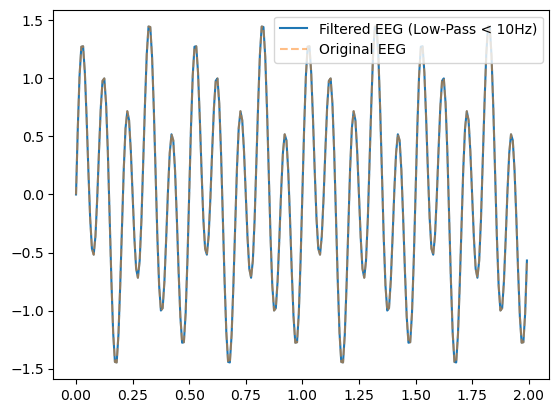

In [58]:
def low_pass_filter(signal, cutoff_freq, fs):
    fft_values = np.fft.fft(signal)  # Compute FFT
    freqs = np.fft.fftfreq(len(signal), 1/fs)  # Frequency axis
    
    # Zero out frequencies higher than the cutoff
    fft_values[np.abs(freqs) > cutoff_freq] = 0
    
    # Inverse FFT to get back filtered signal
    filtered_signal = np.fft.ifft(fft_values)
    return np.real(filtered_signal)

# Apply Low-Pass Filter (Keep only < 10 Hz)
filtered_eeg = low_pass_filter(eeg_signal, 10, fs)

# Plot Filtered Signal
plt.plot(t, filtered_eeg, label="Filtered EEG (Low-Pass < 10Hz)")
plt.plot(t, eeg_signal, alpha=0.5, linestyle="dashed", label="Original EEG")
plt.legend()
plt.show()

Removes frequencies above 10 Hz (e.g., high-frequency noise).
Keeps Alpha & Theta waves, which are useful for dementia analysis.

## Short-Time Fourier Transform (STFT) for Time-Frequency Analysis

Why Use STFT?

Limitations of FFT

The FFT gives only frequency information but does not show how the signal changes over time.

For signals like EEG, where brain activity shifts over time, a time-frequency representation is needed.

Advantages of STFT

Tracks frequency changes over time (good for EEG, IMU, speech).
                                    
Useful for analyzing transient events like gait disturbances in dementia.

Helps detect brain activity shifts in different EEG frequency bands.

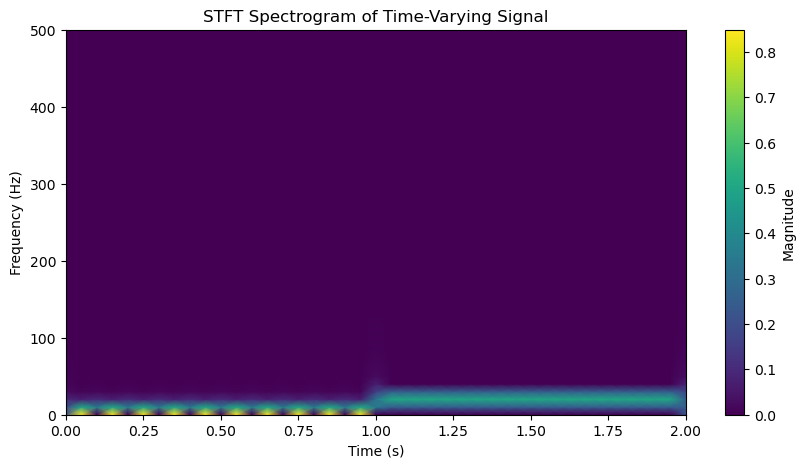

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Generate a time-varying frequency signal
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 2, 2 * fs, endpoint=False)  # 2 seconds
signal1 = np.sin(2 * np.pi * 5 * t[:fs])  # 5 Hz for first 1 sec
signal2 = np.sin(2 * np.pi * 20 * t[fs:])  # 20 Hz for second 1 sec
x_t = np.concatenate((signal1, signal2))  # Combine both signals

# Compute STFT
frequencies, times, Zxx = signal.stft(x_t, fs, nperseg=100)

# Plot STFT Spectrogram
plt.figure(figsize=(10, 5))
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.title("STFT Spectrogram of Time-Varying Signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Magnitude")
plt.show()

The signal changes from 5 Hz to 20 Hz at 1 second.
STFT spectrogram shows this frequency shift over time.
Brighter colors indicate stronger frequency components.

## STFT for EEG Analysis in Dementia

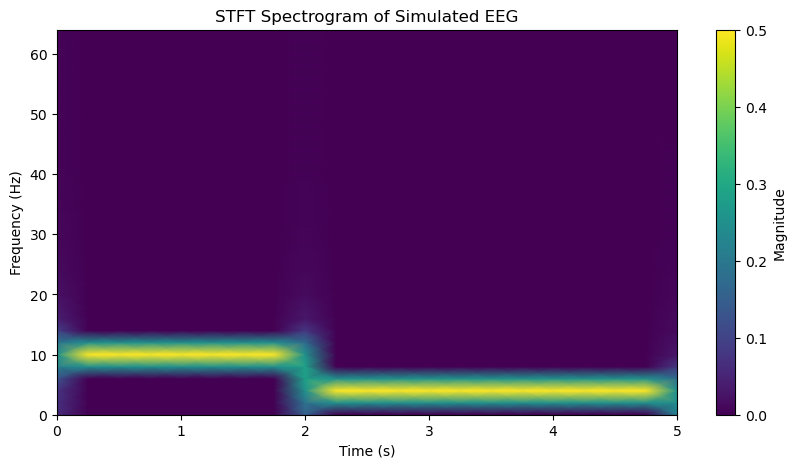

In [67]:
# Simulate EEG signal with dominant Alpha (10 Hz) & Theta (4 Hz) waves
fs = 128  # EEG Sampling Rate
t = np.linspace(0, 5, 5 * fs, endpoint=False)  # 5 seconds duration
eeg1 = np.sin(2 * np.pi * 10 * t[:2*fs])  # Alpha wave (Normal)
eeg2 = np.sin(2 * np.pi * 4 * t[2*fs:])   # Theta wave (Dementia)
eeg_signal = np.concatenate((eeg1, eeg2))  # Combine

# Compute STFT
frequencies, times, Zxx = signal.stft(eeg_signal, fs, nperseg=64)

# Plot Spectrogram
plt.figure(figsize=(10, 5))
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.title("STFT Spectrogram of Simulated EEG")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Magnitude")
plt.show()

The EEG starts with a dominant 10 Hz Alpha wave (normal brain activity).
At 2 seconds, it shifts to a 4 Hz Theta wave (often linked to dementia).
The STFT spectrogram clearly shows this transition.

## STFT for Gait Analysis (IMU Sensor Data)

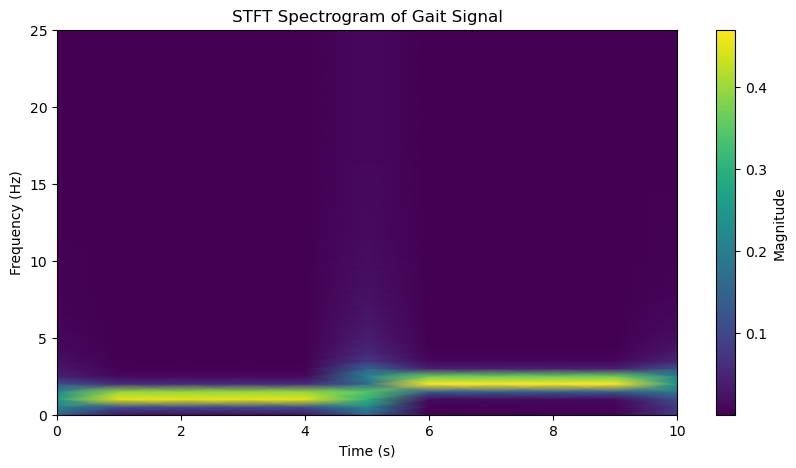

In [71]:
# Simulate IMU gait signal (walking pattern)
fs = 50  # Sampling frequency (50 Hz for IMU)
t = np.linspace(0, 10, fs * 10, endpoint=False)  # 10 seconds
gait1 = np.sin(2 * np.pi * 1.2 * t[:fs*5])  # Regular steps (Healthy)
gait2 = np.sin(2 * np.pi * (1.2 + 0.5*np.random.randn()) * t[fs*5:])  # Irregular steps (Dementia)
gait_signal = np.concatenate((gait1, gait2))  # Combine

# Compute STFT
frequencies, times, Zxx = signal.stft(gait_signal, fs, nperseg=100)

# Plot Spectrogram
plt.figure(figsize=(10, 5))
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.title("STFT Spectrogram of Gait Signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Magnitude")
plt.show()

First 5 sec → Regular step frequency (Healthy gait).
After 5 sec → Irregular frequency shifts (Dementia gait).
STFT spectrogram highlights the gait pattern change over time.